[[253 253 253 ... 252 252 252]
 [252 252 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 252 252 ... 253 253 253]
 [253 253 253 ... 253 253 252]
 [253 252 253 ... 253 253 253]]


(161, 28, 28)

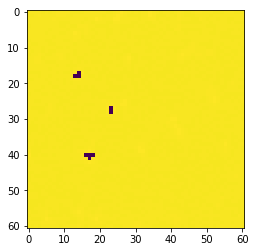

In [28]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib import rnn
from skimage import feature
import numpy as np
import cv2 as cv
import mahotas as mt
import scipy as sc
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.svm import LinearSVC
from skimage import feature
import numpy as np
from skimage import feature
import numpy as np
numPoints=24

# Data Dimension
num_input = 3 # MNIST data input (image shape: 28x28)
timesteps = num_input       # Timesteps
n_classes = 3   # Number of classes, one class per digit


radius=6
eps=1e-7
lung_image=[]
labels=[]
i=0
for lung_dir_path in glob.glob("/home/rishotics/somita/patches/*"):
    i=int(lung_dir_path[36:-5])
    
    if(i>=1 and i <=59):
        label=0
    elif(i>59 and i<=109):
        label=1
    else:
        label=2
    
    image=cv.imread(lung_dir_path,0)
    if(i==7):
        plt.imshow(image)
        print(image)
    image=cv.resize(image,(28,28))
    
    labels.append(label)
 #   labels.append(label)
    
    lung_image.append(image)
   # lung_image.append(image2)
    
lung_image=np.array(lung_image)
labels=np.array(labels)
lung_to_dict={i:k for k,i in enumerate(np.unique(labels))}
dict_to_id={i:k for k,i in lung_to_dict.items()}
label_id=np.array([lung_to_dict[x] for x in labels])
#lung_image=np.reshape(lung_image,(161*4,timesteps*timesteps))
lung_image.shape



In [25]:
import xlsxwriter

workbook = xlsxwriter.Workbook('Lbp.xlsx')
worksheet = workbook.add_worksheet()
row = 0
X_sheet=(np.transpose(np.reshape(X,(-1,61*61))))
for col, data in enumerate(X_sheet):
    worksheet.write_column(row, col, data)

workbook.close()

In [26]:
import xlsxwriter

workbook = xlsxwriter.Workbook('y_lbp.xlsx')
worksheet = workbook.add_worksheet()
row = 0
X_sheet=(np.transpose(np.reshape(y,(-1,1))))
for col, data in enumerate(X_sheet):
    worksheet.write_column(row, col, data)

workbook.close()

In [19]:
label_id

array([1, 0, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1,
       0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1,
       0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2,
       2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       1, 0, 1, 1, 0, 1, 1])

In [24]:


def LBP_features(image,radius):
    
    n_points = 8 * radius
    gray = image  
    lbp = feature.local_binary_pattern(gray, numPoints,radius, method="uniform")
  #  (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, numPoints + 3),range=(0, numPoints + 2))
 
		# normalize the histogram
 #   hist = hist.astype("float")
  #  hist /= (hist.sum() + eps)
   # hist=np.array(hist)
    return lbp
j=0



X1=np.zeros((lung_image.shape[0],61,61))
X2=np.zeros((lung_image.shape[0],61,61))
for i in lung_image:
   # glcm_features=glcm(i)
   # gabor_features=gabor_feature(i)
    lbp_features1 = LBP_features(i,1)
    lbp_features2 = LBP_features(i,2)
    
    X1[j,:,:]=lbp_features1
    X2[j,:,:]=lbp_features2
    j=j+1

X=np.concatenate((X1,X2),axis=0)
y=np.concatenate((label_id,label_id),axis=0)
from keras.utils import to_categorical
#X=np.reshape(X,(322,61,61,1))
y=np.reshape(y,(322,1))
X.shape,y.shape


((322, 61, 61), (322, 1))

In [5]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
from sklearn.manifold import Isomap
model = Isomap(n_components=300)
#X = model.fit_transform(X)
X.shape

/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: Found array with dim 4. Estimator expected <= 2.

In [29]:
train_X,valid_X,train_ground,valid_ground = train_test_split(np.reshape(lung_image,(-1,28,28,1))/255.0,np.reshape(lung_image,(-1,28,28,1))/255.0, 
                                                             test_size=0.2, 
                                                             random_state=13)
#y_train = to_categorical(y_train)
#y_valid=to_categorical(y_valid)


In [31]:

import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop
batch_size = 2
epochs = 200
inChannel = 1
x, y = 28,28
input_img = Input(shape = (x,y, inChannel))
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [32]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 128)         147584    
__________

In [33]:


autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))


Train on 128 samples, validate on 33 samples
Epoch 1/200
128/128 [==============================] - 2s 12ms/step - loss: 0.0695 - val_loss: 0.0405
Epoch 2/200
128/128 [==============================] - 1s 10ms/step - loss: 0.0312 - val_loss: 0.0313
Epoch 3/200
128/128 [==============================] - 1s 10ms/step - loss: 0.0252 - val_loss: 0.0196
Epoch 4/200
128/128 [==============================] - 1s 10ms/step - loss: 0.0215 - val_loss: 0.0184
Epoch 5/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0187 - val_loss: 0.0173
Epoch 6/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0184 - val_loss: 0.0163
Epoch 7/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0165 - val_loss: 0.0179
Epoch 8/200
128/128 [==============================] - 2s 12ms/step - loss: 0.0159 - val_loss: 0.0150
Epoch 9/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0145 - val_loss: 0.0182
Epoch 10/200
128/128 [===============

128/128 [==============================] - 1s 11ms/step - loss: 0.0023 - val_loss: 0.0141
Epoch 81/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0023 - val_loss: 0.0143
Epoch 82/200
128/128 [==============================] - 1s 10ms/step - loss: 0.0023 - val_loss: 0.0142
Epoch 83/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0021 - val_loss: 0.0141
Epoch 84/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0021 - val_loss: 0.0141
Epoch 85/200
128/128 [==============================] - 1s 10ms/step - loss: 0.0021 - val_loss: 0.0139
Epoch 86/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0021 - val_loss: 0.0147
Epoch 87/200
128/128 [==============================] - 1s 10ms/step - loss: 0.0020 - val_loss: 0.0138
Epoch 88/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0021 - val_loss: 0.0137
Epoch 89/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0019 - val_l

128/128 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 0.0136
Epoch 160/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 0.0137
Epoch 161/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 0.0136
Epoch 162/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 0.0136
Epoch 163/200
128/128 [==============================] - 2s 13ms/step - loss: 0.0011 - val_loss: 0.0144
Epoch 164/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0010 - val_loss: 0.0134
Epoch 165/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0011 - val_loss: 0.0136
Epoch 166/200
128/128 [==============================] - 1s 11ms/step - loss: 9.9514e-04 - val_loss: 0.0136
Epoch 167/200
128/128 [==============================] - 2s 12ms/step - loss: 0.0011 - val_loss: 0.0138
Epoch 168/200
128/128 [==============================] - 1s 11ms/step - lo

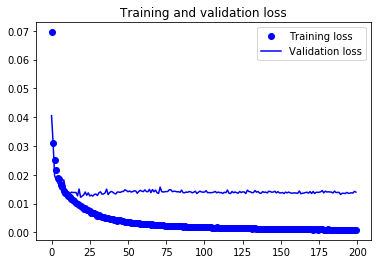

In [34]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


valid Images


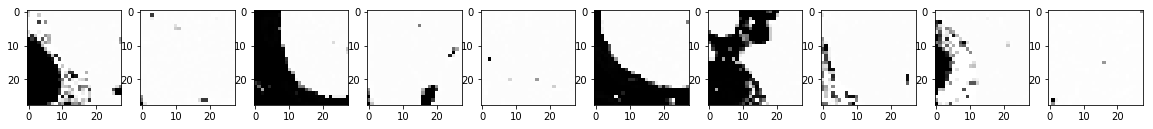

Reconstruction of Test Images


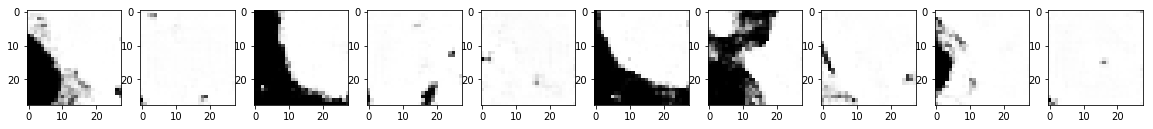

In [42]:
pred = autoencoder.predict(valid_X)
plt.figure(figsize=(20, 4))
print("valid Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(valid_X[i, ..., 0], cmap='gray')
    curr_lbl = valid_ground[i]
   # plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(n):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(x_train,y_train)
#class_predicted=neigh.predict(select_X_test
    print("KNN with ")
    print(n)
    print(" nearest neightbours")
    print(" ")
    print("score= ", 100*neigh.score(x_valid, y_valid, sample_weight=None))
from sklearn.metrics import confusion_matrix
for i in range(1,100):
    KNN(i)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=0.05,
                    hidden_layer_sizes=(256*2,), random_state=1)

clf.fit(x_train,y_train)
clf.score(x_valid, y_valid)*100